### Introduction to the Notebook

#### Overview
This Jupyter notebook focuses on exploring and visualizing the MNIST dataset, a classic in the field of machine learning known for its collection of handwritten digits. The MNIST dataset is often used as a benchmark for image processing and machine learning algorithms.

#### Key Points of the Notebook:
1. **Data Selection**: We filter the MNIST dataset to focus on two specific digits for a more targeted analysis.
2. **Data Visualization**: A grid of images is created to visualize the selected digit data.
3. **Principal Component Analysis (PCA)**:
   - We perform PCA using Singular Value Decomposition (SVD) to understand the data's underlying structure.
   - The singular values and vectors are plotted to illustrate the variance and principal components in the data.
4. **3D Data Projection**: The dataset is projected onto the first three principal components, and the results are visualized in a 3D scatter plot. This helps in observing the data distribution in a reduced-dimensional space.
5. **Class Comparison**: We repeat the projection process for two different classes (digits) and visualize them in contrasting colors to observe class separability in the principal component space.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import Lasso
import warnings # For Github share, hide local file paths
warnings.filterwarnings('ignore')


loadData=loadmat('../../data/mnist.mat')




### Data Preparation and Selection

In this section, we:
- Convert the MNIST dataset labels and images to floating-point format for numerical computations.
- Select and separate images of two specific digits (3 and 8) from the dataset.
- Create two subsets, `A1` and `A2`, containing images of digits 3 and 8, respectively, and a combined subset `A` with both.
- Set `plot_dim` to 3, preparing for a 3-dimensional data visualization. 

In [2]:
label = loadData['trainY'].astype(float)
data  = loadData['trainX'].astype(float)
idx1 = (label == 3).flatten()   # Ensuring it is a 1D array
idx2 = (label == 8).flatten()

idx = idx1 | idx2  # Combining idx1 and idx2 conditions
A = data[idx]
A1 = data[idx1]
A2 = data[idx2]

plot_dim = 3  # Plot dimension

To take a look at the data, we will do the following.

1. **Initialize Variables**:
   - `n, d = A.shape`: This gets the number of images (`n`) and the number of pixels in each image (`d`) from `A`. For MNIST, typically `d` is 784, which is 28x28 pixels flattened.
   - `edge = 50`: This sets the number of images per row and column in the grid.
   - `ndim = 28`: This is the dimension of one side of an image (since MNIST images are 28x28 pixels).
   - `dtot = edge * ndim`: This calculates the total dimension of the grid image. With `edge = 50` and `ndim = 28`, the grid will be 1400x1400 pixels.

2. **Create an Empty Grid**:
   - `All = np.zeros((dtot, dtot))`: Initializes a large square grid of zeros. This will be filled with the individual images.

3. **Fill the Grid with Images**:
   - The nested `for` loops iterate over the grid, placing each image from `A` into a 28x28 box within `All`.
   - `All[i:i + ndim, j:j + ndim] = A[k, :].reshape(ndim, ndim).T`: This line extracts the `k`-th image from `A`, reshapes it from a flattened array into a 28x28 matrix, transposes it (`.T`), and places it into the correct position on the grid.
   - The `if k >= n` checks are used to prevent an index error in case there are fewer images than spaces in the grid.

4. **Result**:
   - After the loops complete, `All` contains a large image made up of the individual MNIST images arranged in a grid format. Each small 28x28 block in this grid is an individual image from `A`.

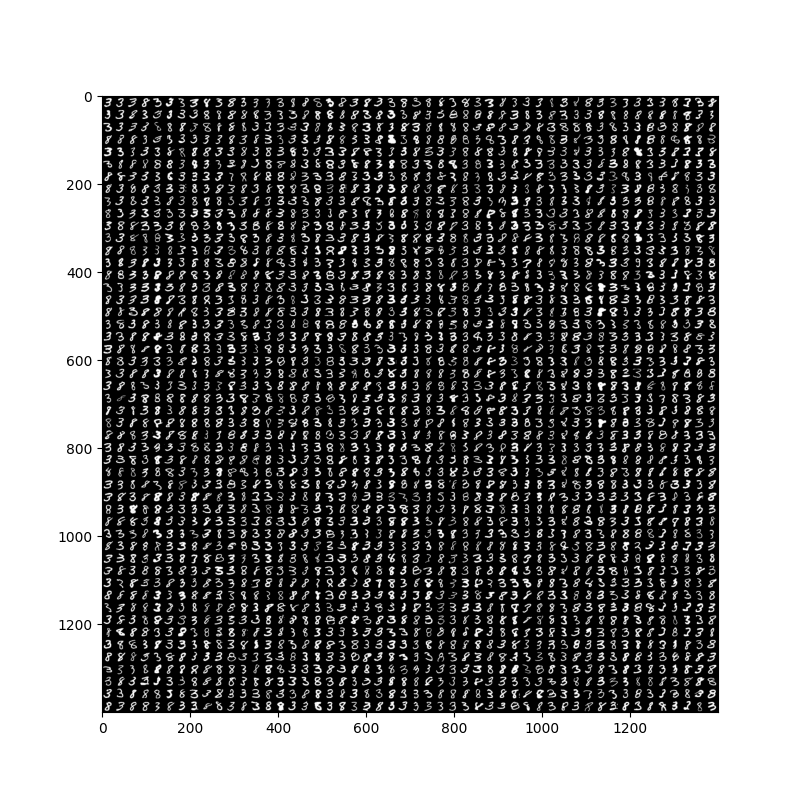

In [18]:
n, d = A.shape
edge = 50
ndim = 28
dtot = edge * ndim
All = np.zeros((dtot, dtot))
k = 0

for i in range(0, ndim * (edge - 1) + 1, ndim):
    for j in range(0, ndim * (edge - 1) + 1, ndim):
        All[i:i + ndim, j:j + ndim] = A[k, :].reshape(ndim, ndim).T
        k += 1
        if k >= n:  # To prevent index error if k exceeds the number of images
            break
    if k >= n:
        break
  
fig = plt.figure(figsize=(8, 8))  # Set the figure size
ax = fig.add_subplot(1, 1, 1)  # Create a single subplot in the figure
ax.imshow(All.T, cmap='gray')  # Display the image
plt.show()


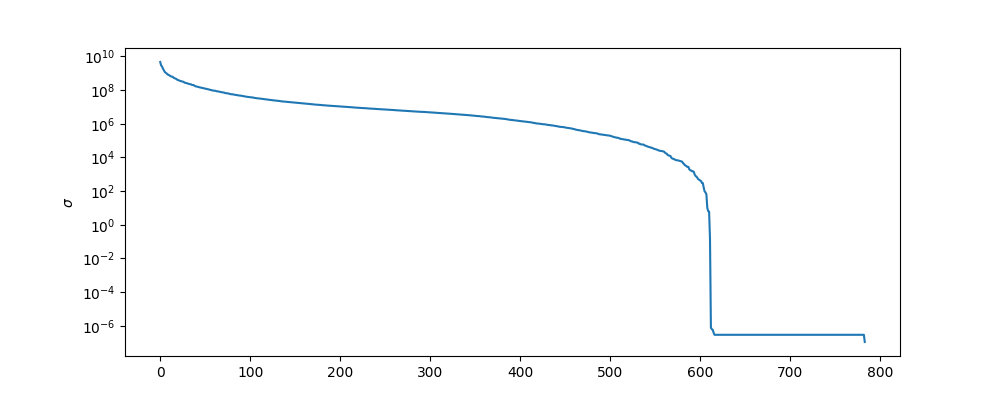

In [19]:
# Centering the data (not dividing by sqrt(n-1) as it's part of PCA computation in sklearn)
At = A - np.mean(A, axis=0)

# Computing covariance matrix (Bt)
Bt = np.dot(At.T, At)

U, S, Vt=np.linalg.svd(Bt,full_matrices=False)
non_zero_singular_values = S[S > 0]

plt.figure(figsize=(10,4))
plt.semilogy(S)
# plt.axis('square')
plt.ylabel('$\sigma$')
plt.show()

### Visualization of Principal Components

The first 8 principal components are generated visually.

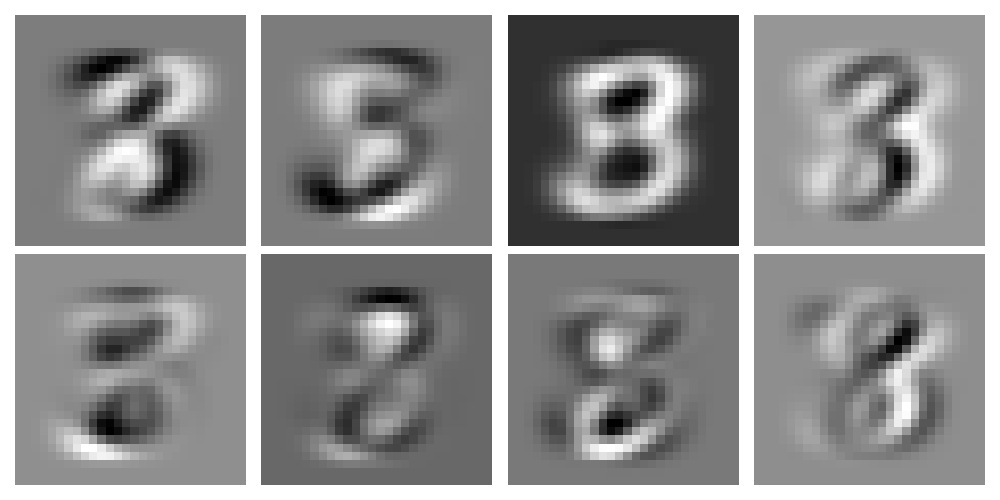

In [20]:
ncol = 4
nrow = 2

plt.figure(3, figsize=(10, 5))

for j in range(ncol * nrow):
    Vc = np.reshape(S[j] * Vt[j, :], (ndim, ndim))
    plt.subplot(nrow, ncol, j + 1)
    plt.imshow(Vc, cmap='gray', aspect='equal')
    plt.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()


### 3D Visualization

The first ``3 principal component`` we have found from PCA is used to create 3D graph of values in ``A1``, which represents `3`. By adding A2, which prepresents `8`, we can see how these two class is distributed with respect to first three principal component.

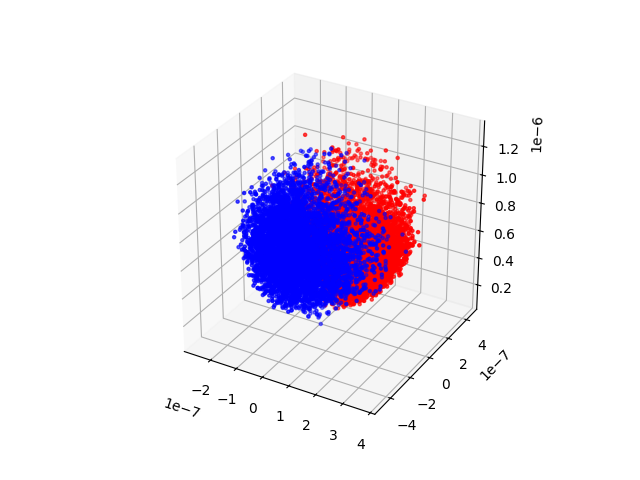

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pc1, pc2, pc3 = 0 ,1 ,2

U1 = A1 @ Vt[pc1, :] / S[pc1]
U2 = A1 @ Vt[pc2, :] / S[pc2]
U3 = A1 @ Vt[pc3, :] / S[pc3]

plt.figure(4)

if plot_dim == 2:
    plt.scatter(U1, U2, c='blue', marker='.')
    plt.axis('equal')
elif plot_dim == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(U1, U2, U3, c='blue', marker='.')
    ax.set_box_aspect([1,1,1])  # Equal aspect ratio

# Repeat for A2 (second class)
U1 = A2 @ Vt[pc1, :] / S[pc1]
U2 = A2 @ Vt[pc2, :] / S[pc2]
U3 = A2 @ Vt[pc3, :] / S[pc3]

if plot_dim == 2:
    plt.scatter(U1, U2, c='red', marker='.')
    plt.axis('equal')
elif plot_dim == 3:
    ax.scatter(U1, U2, U3, c='red', marker='.')

plt.show()
